<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{{-0.01}x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

-------
La función de distribución de X es
$$
F ( x ) = \begin{cases}
~~ 1 - e^{{-0.01}x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

Entonces 

$P(50\leq X \leq 150) = F(150)- F(50) = 1 - e^{{-0.01}*150}- ( 1 - e^{{-0.01}*50})= - e^{{-0.01}*150}+   e^{{-0.01}*50}$

$P(0\leq X \leq 100) = F(100)- F(0) = 1 - e^{{-0.01}*100}- ( 1 - e^{{-0.01}*0})= - e^{{-0.01}*100}+   1$

In [2]:
import numpy as np
-np.exp(-0.001*150)+np.exp(-0.001*50)

0.09052144807565621

In [3]:
-np.exp(-0.001*100)+np.exp(-0.001*0)

0.09516258196404048

In [4]:
from scipy.stats import expon
expon.cdf(150, loc=0, scale=1/0.001)-expon.cdf(50, loc=0, scale=1/0.001) #función distribucíon exponencial

0.0905214480756562

In [5]:
expon.cdf(100, loc=0, scale=1/0.001)-expon.cdf(0, loc=0, scale=1/0.001)

0.09516258196404044

La probabilidad de que funcione entre 50 y 150 horas antes de descomponerse es 

$P(50\leq X \leq 150) =0.0905214480756562$

La probabilidad de que se descomponga antes de las 100 horas es

$P(0\leq X \leq 100)= 0.09516258196404044$ 

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [28]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20,30)

In [29]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean       0.067499
std        5.038377
min      -21.169329
25%       -3.365252
50%        0.122617
75%        3.510515
max       16.475500


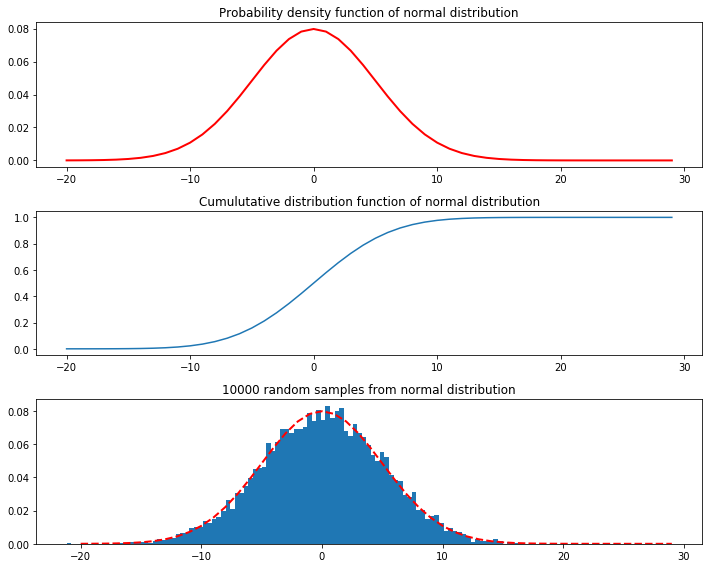

In [30]:
graphic_normal(mu, sigma, rng)

Variando los valores de $\mu$ se traslada la gráfica.

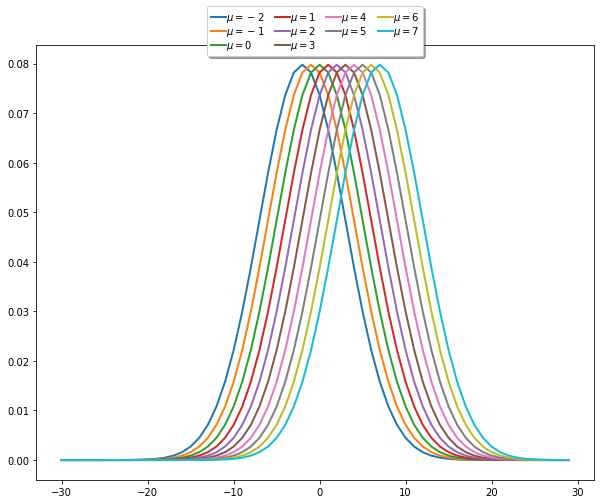

In [25]:
dist=[]
for i in range(0,10):
 dist.append(norm(i-2, sigma))
#colormap = plt.cm.gist_ncar
#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, 10)])
plt.figure(figsize=(10,8))
labels = []
for i in range(0,10):
 plt.plot(rng, dist[i].pdf(rng), linewidth=2)
 labels.append(r'$\mu = %i $' % (i-2))
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)



Variando $\sigma$ se escala la campana y se modifican los puntos de inflexión,, cuando $\sigma$ crece la gráfica se achata. 
Variando el rango se modifican los valores del 

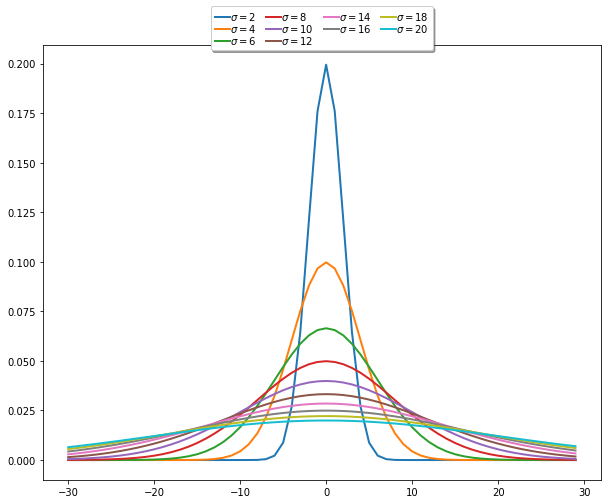

In [33]:
dist=[]
for i in range(0,10):
 dist.append(norm(mu,2*(i+1)))
plt.figure(figsize=(10,8))
labels2 = []
for i in range(0,10):
 plt.plot(range(-30,30), dist[i].pdf(range(-30,30)), linewidth=2)
 labels2.append(r'$\sigma = %i $' % (2*(i+1)))
plt.legend(labels2, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)